In [847]:
# Importing all the essential libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [848]:
# Setting up visualisations
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(12,7), 
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1.5)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

In [849]:
# Loading the Titanic datset
titanic_data = pd.read_csv(r"titanic_train.csv")

In [850]:
# First five columns 
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1, 'Missing values')

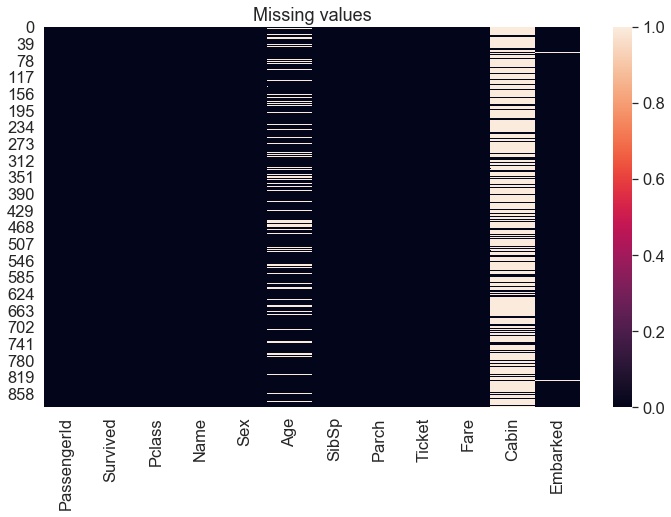

In [851]:
# Missing data
sns.heatmap(titanic_data.isnull()).set_title("Missing values")

**Observation**: Fromt the above we can see that there are  lot of missing values with the cabin feature and age feature, we ust handle these missing values to imporve accuracy or delete the feature if they are not going to contribute to the prediction

In [852]:
# Summary of the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [853]:
# Different Categories 
titanic_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**Observation**: The features Survied, PClass, Sex, SibSp and Parch has minimum categories

## Survived 

Text(0.5, 1.0, 'Training Data - Percentage of people survived and not survied')

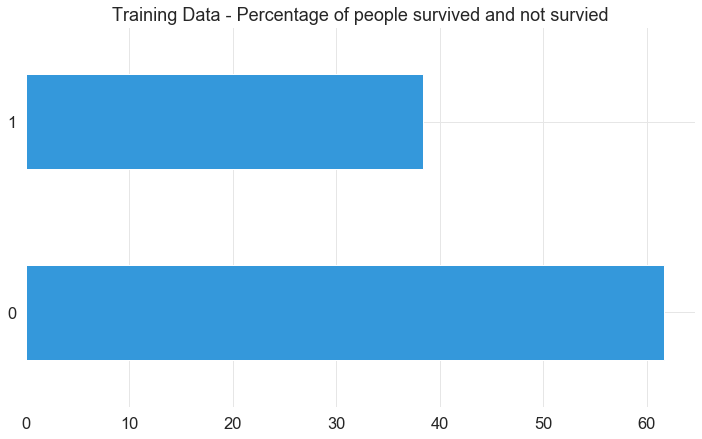

In [854]:
# Percent of passengers survived and not survived
(titanic_data["Survived"].value_counts(normalize = True)*100).plot.barh().set_title("Training Data - Percentage of people survived and not survied")

**Observation**: More passengers have died, > 60% have not made it.

Text(0.5, 1.0, 'Count plot of survived with gender info ')

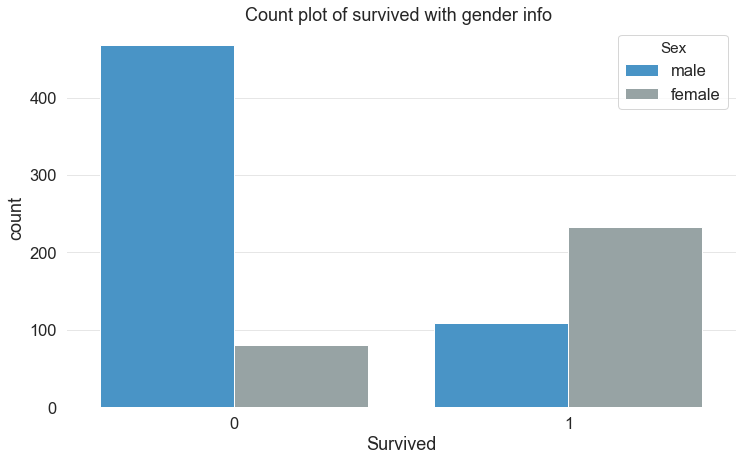

In [855]:
# Count plot of people survived and not survived
sns.countplot(x="Survived",data=titanic_data,hue="Sex")
plt.title("Count plot of survived with gender info ") # for title

**Observations**: More than 80% of the male travellers did not make it. And around 30% of females did not make it

## Sex

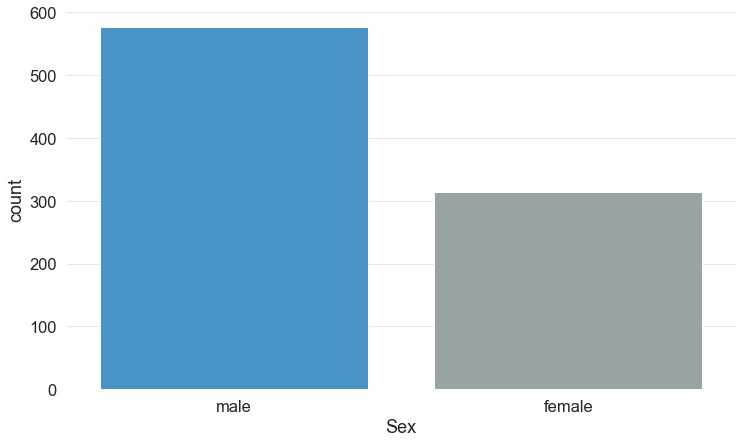

In [856]:
# Percent of Male and female passengers
sns.countplot(titanic_data["Sex"])

In [857]:
print("Total passengers travelled: " )
print(577+314)
print("Percent of male passengers travelled: " )
print((577/891)*100)

Total passengers travelled: 
891
Percent of male passengers travelled: 
64.75869809203144


**Observations**: More than 65% of tavellers were male and 35% were female

## Passenger class

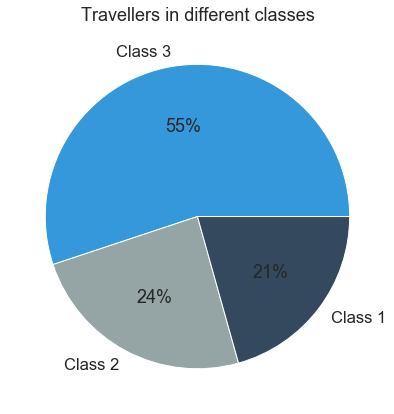

In [858]:
# Pie chart for different classes 
classes = ['Class 3', 'Class 2', 'Class 1']
plt.pie(titanic_data["Pclass"].value_counts(), labels = classes, autopct='%.0f%%')
plt.title("Travellers in different classes") # for title
plt.show()

**Observation**: Maximum number of passengers travelled in Class 3

Text(0.5, 1.0, 'Count plot of survived with passenger class info ')

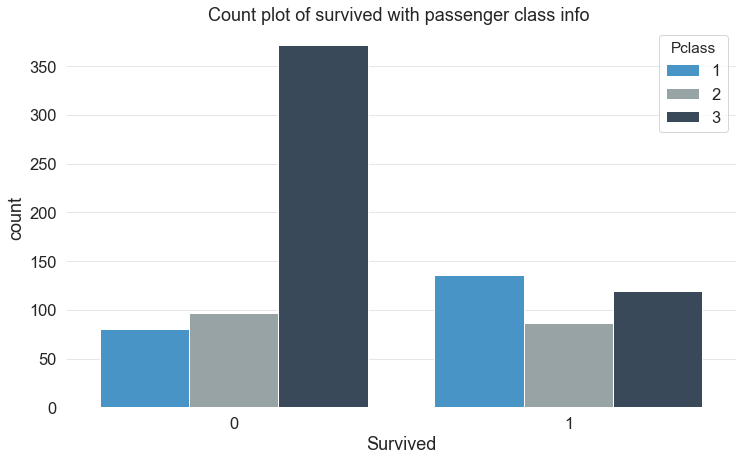

In [859]:
# Visualization between (Survived, P-class) 
sns.countplot(x="Survived",data=titanic_data,hue="Pclass")
plt.title("Count plot of survived with passenger class info ") # for title

**Observation**: From above graph we can see the counts of  passengers based on their class of travel, who have survived and not survived; 1 indicates people survived and 0 indicates those who have not made it. 

In [860]:
# Calculating percentages for each category
pclass_1_survivor_distribution = round((titanic_data[titanic_data["Pclass"] == 1]["Survived"] == 1).value_counts()[1]/len(titanic_data[titanic_data["Pclass"] == 1]["Survived"] == 1)*100,3)
pclass_2_survivor_distribution = round((titanic_data[titanic_data["Pclass"] == 2]["Survived"] == 1).value_counts()[1]/len(titanic_data[titanic_data["Pclass"] == 2]["Survived"] == 1)*100,3)
pclass_3_survivor_distribution = round((titanic_data[titanic_data["Pclass"] == 3]["Survived"] == 1).value_counts()[1]/len(titanic_data[titanic_data["Pclass"] == 3]["Survived"] == 1)*100,3)

# Creating dataframe to show the values
pclass_percentage_dataFrame = pd.DataFrame(
    { "Percentage Survived":{"Class 1": pclass_1_survivor_distribution,"Class 2": pclass_2_survivor_distribution, "Class 3": pclass_3_survivor_distribution},  
     "Percentage Not Survived":{"Class 1": 100-pclass_1_survivor_distribution,"Class 2": 100-pclass_2_survivor_distribution, "Class 3": 100-pclass_3_survivor_distribution}})
pclass_percentage_dataFrame

,Percentage Survived,Percentage Not Survived
Class 1,62.963,37.037
Class 2,47.283,52.717
Class 3,24.236,75.764


## Age

Text(0.5, 1.0, "Histogram of overall passenger's age")

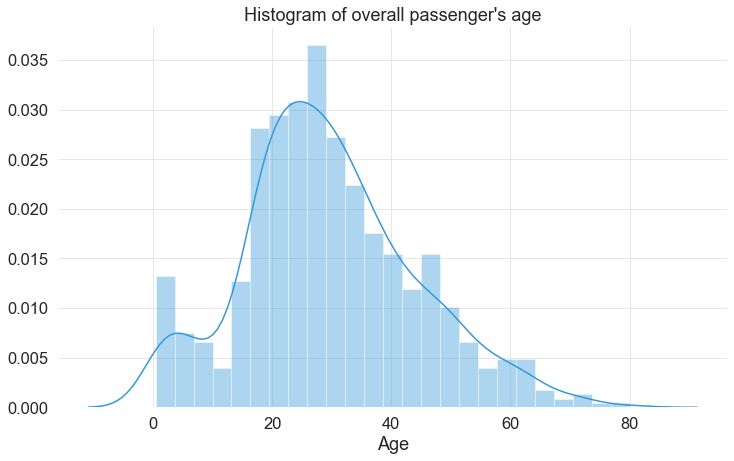

In [861]:
# Visualizing overall passenger's age
sns.distplot(titanic_data["Age"].dropna(),bins=25) # Histogram of age data of passengers by dropping the empty values
plt.title("Histogram of overall passenger's age") # for title

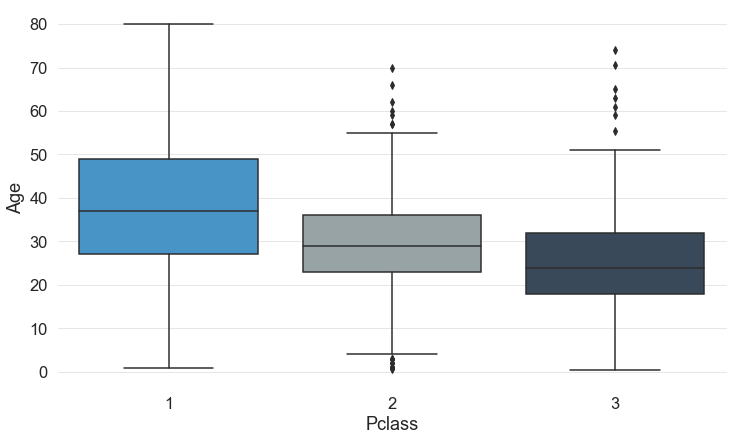

In [862]:
# Visualizing the mean age of passengers belonging to differnet classes
sns.boxplot(x="Pclass",y="Age",data=titanic_data)

**Observation**: Mean age of passengers in class 1 are around 35, follwed by people around 30 years and then the least around 20s in 3rd class

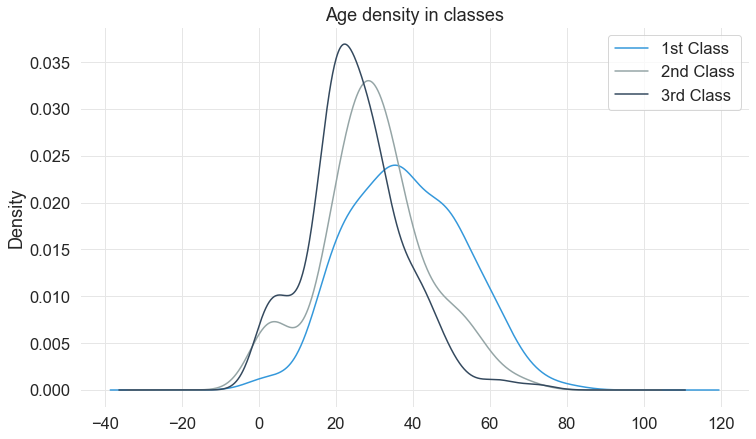

In [863]:
# Finding the density of ages in all 3 classes
for passengerClass in [1,2,3]:    #for 3 classes
    titanic_data[titanic_data["Pclass"] == passengerClass]["Age"].plot(kind="kde")
plt.title("Age density in classes")
plt.legend(("1st Class","2nd Class","3rd Class"))

Text(0.5, 1.0, 'Histogram of age of passengers')

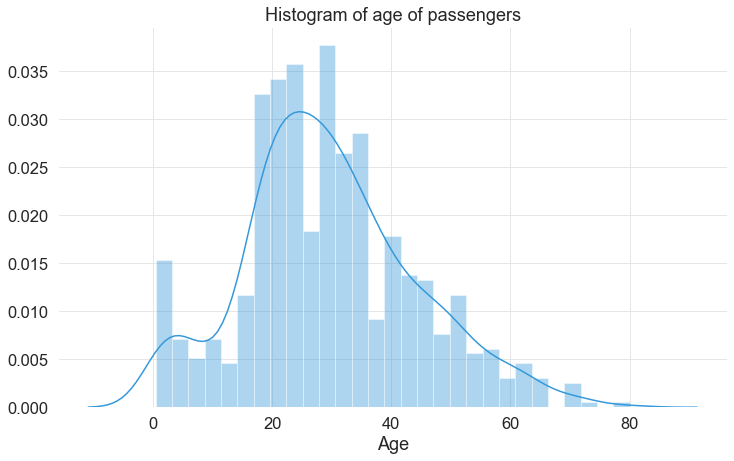

In [864]:
# Visualizing overall passenger's age
sns.distplot(titanic_data["Age"].dropna(),bins=29, color="C0") # Histogram of age data of passengers by dropping the empty values
plt.title("Histogram of age of passengers") # for title

**Observation**: Most of the people travelling belong to the age group of 20s

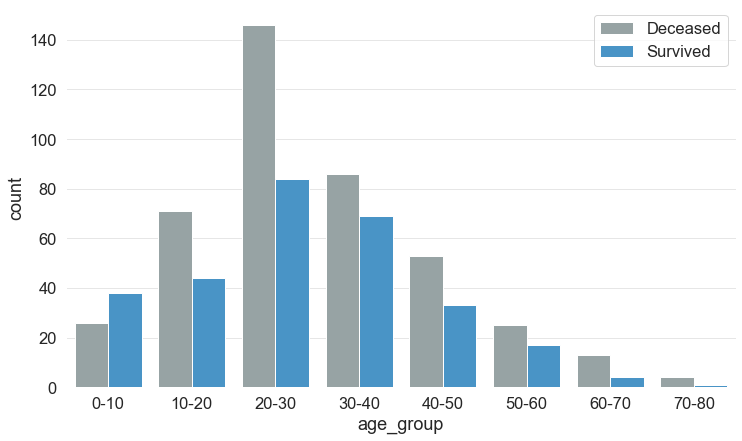

In [865]:
titanic_data["age_group"] = pd.cut(x = titanic_data["Age"],bins = [0,10,20,30,40,50,60,70,80], labels=["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80"])
sns.countplot(x = "age_group", hue = "Survived", data = titanic_data, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])

Text(0.5, 1.0, 'Histogram of age date of passengers who belong to the third class')

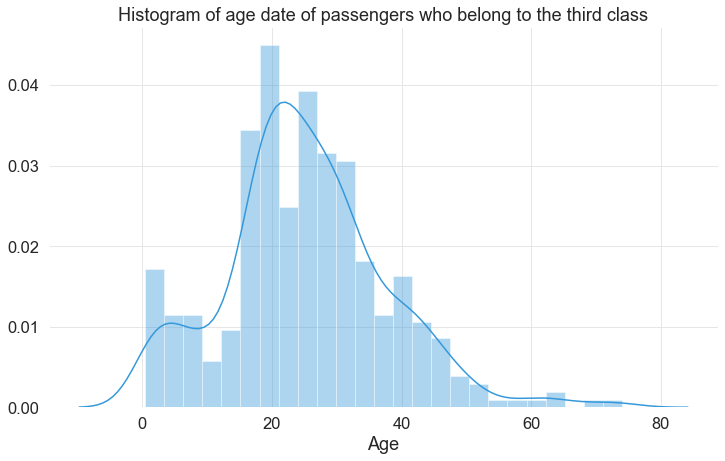

In [866]:
# Visualization of third class and Age 
ageDataOfThirdClass = titanic_data[titanic_data["Pclass"] == 3]["Age"] # Filtering off the third class and extracting the age feature
sns.distplot(ageDataOfThirdClass, bins =25)
plt.title("Histogram of age date of passengers who belong to the third class") # for title

## SibSp

SibSip: Refers to the number of siblings/spouse brought by one traveller

In [867]:
titanic_data["SibSp"].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

From above, we can see that max number of spouse or siblings travelled with one person. 

Text(0.5, 1.0, 'Number of siblings/spouses vs survival count')

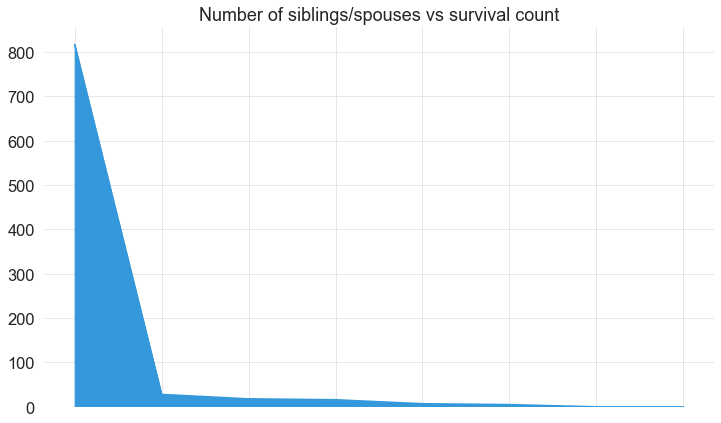

In [868]:
duplicateDataFrame = pd.DataFrame()
duplicateDataFrame['survived'] = titanic_data["Survived"]
duplicateDataFrame['sibling_spouse'] = pd.cut(x = titanic_data["SibSp"],bins = [0, 1, 2, 3, 4, 5, 6,7,8], include_lowest = True)
(duplicateDataFrame["sibling_spouse"].value_counts()).plot.area().set_title("Number of siblings/spouses vs survival count")

**Observation**: We can see that the survivors curve drops low as the number of siblings or spouse increase

## Parch

Parch: This refers to the no of parents and children with each traveller

In [869]:
titanic_data["Parch"].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

Text(0.5, 1.0, 'Number of parents/children vs survival')

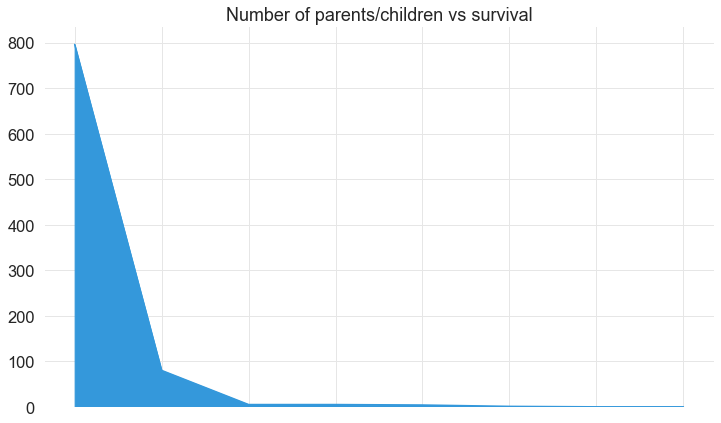

In [870]:
duplicateDataFrame['parentsAndChildren'] = pd.cut(titanic_data["Parch"], [0, 1, 2, 3, 4, 5, 6, 7, 8], include_lowest = True)
(duplicateDataFrame.parentsAndChildren.value_counts()).plot.area().set_title("Number of parents/children vs survival")

## Fare

In [871]:
titanic_data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Histogram of ticket fare ')

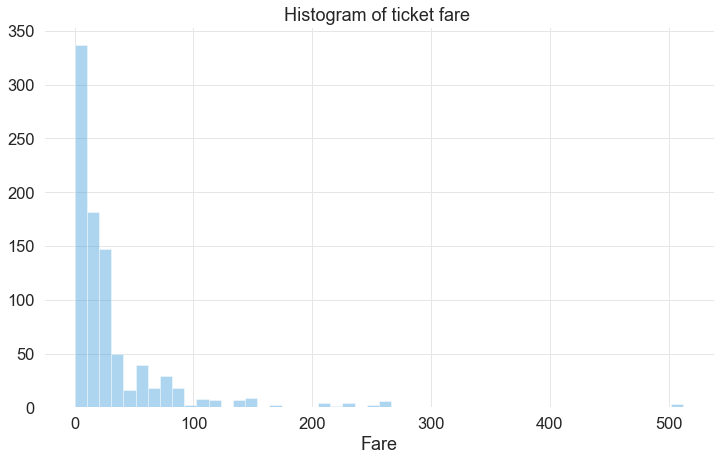

In [872]:
# Histogram of ticket Fare
sns.distplot(titanic_data["Fare"], kde=False)
plt.title("Histogram of ticket fare ") # for histogram title

**Obseravation**: The above distribution shows that most of the passenger's tickets were ranging between 0 and 50 units, this is why most of the people were travelling in the 3rd class.

Text(0.5, 1.0, 'Count of ticket fares purchased')

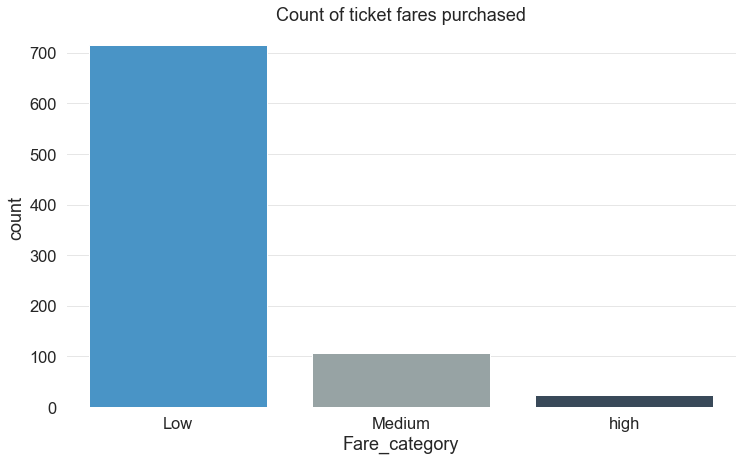

In [873]:
titanic_data["Fare_category"] = pd.cut(x = titanic_data["Fare"], bins = [0, 50, 100, 150], labels=["Low","Medium", "high"])
sns.countplot(x = titanic_data["Fare_category"])
plt.title("Count of ticket fares purchased")

Text(0.5, 1.0, 'Survival based on ticket price')

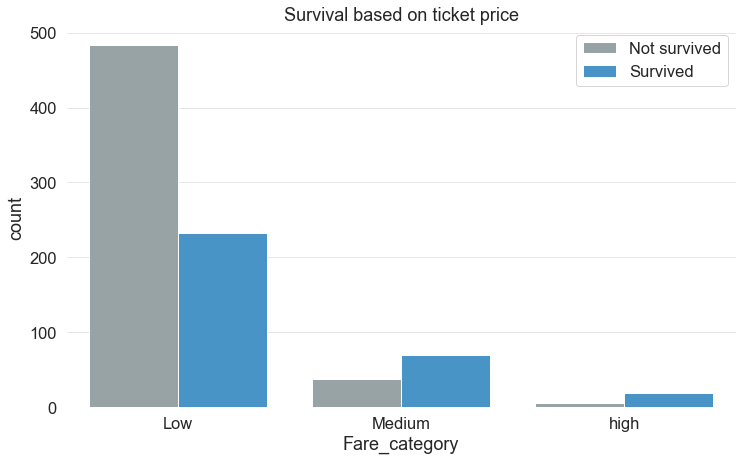

In [874]:
titanic_data["Fare_category"] = pd.cut(x = titanic_data["Fare"], bins = [0, 50, 100, 150], labels=["Low","Medium", "high"])
fareAndSurvival = sns.countplot(x = titanic_data["Fare_category"], hue = "Survived", data = titanic_data, palette=["C1", "C0"])
fareAndSurvival.legend(labels = ["Not survived", "Survived"])
plt.title("Survival based on ticket price")

**Observation**: It is clear that the passengers who bought high priced tickets had more probability to survive

## Embarked

Embarked feature refers to the place from which the passengers are travelling from.

Text(0.5, 1.0, 'Count of passengers from Southampton, Cherbourg, Queenstown')

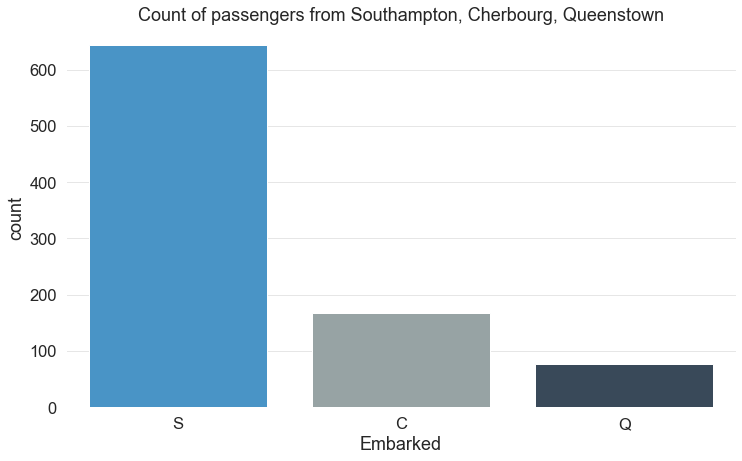

In [875]:
sns.countplot(titanic_data["Embarked"])
plt.title("Count of passengers from Southampton, Cherbourg, Queenstown")

Text(0.5, 1.0, 'Embarked and survival')

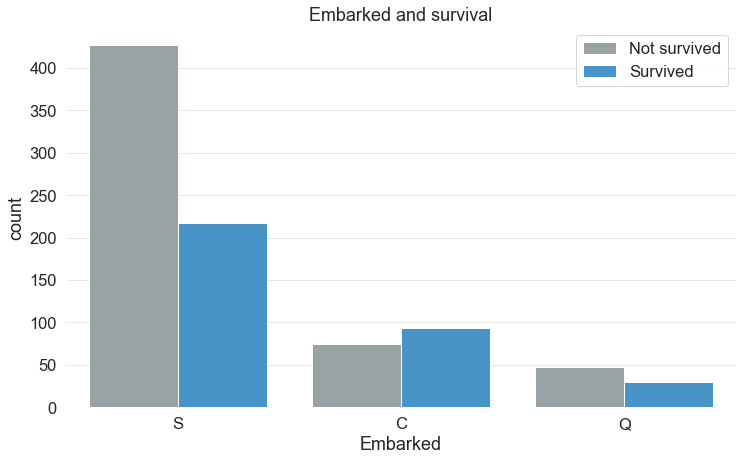

In [876]:
sns.countplot(x = "Embarked", hue = "Survived", data = titanic_data, palette=["C1", "C0"]).legend(labels = ["Not survived", "Survived"])
plt.title("Embarked and survival")

**Observation**: 67% of passengers are from Southampton and the survival rate is more amoung passengers who are from Cherbourg

## Handling missing values

Text(0.5, 1, 'Missing values')

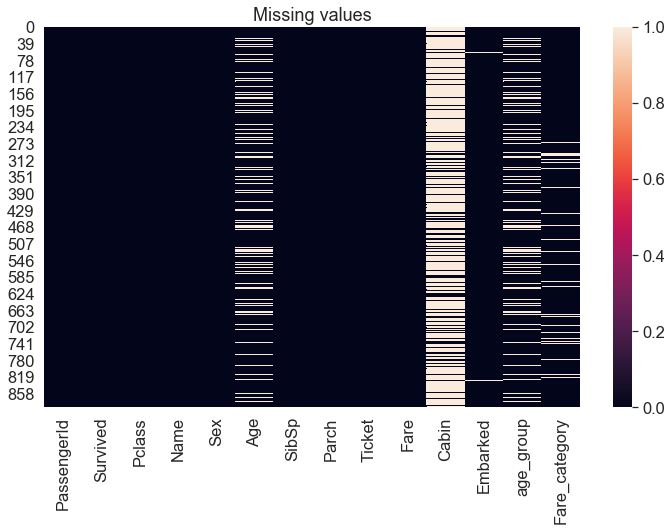

In [877]:
# Missing data
sns.heatmap(titanic_data.isnull()).set_title("Missing values")

In [878]:
# Function to impute the mean age of the passengers belonging to their respective class
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38 #Mean age
        elif Pclass ==2:
            return 29 #Mean age
        else:
            return 24 #Mean age
    else:
        return Age

In [879]:
# Imputed values are saved in the variable
titanic_data["Age"] = titanic_data[["Age","Pclass"]].apply(impute_age,axis=1)

In [880]:
# Original set of columns
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'age_group',
       'Fare_category'],
      dtype='object')

In [881]:
# Dropping not so useful columns
titanic_data = titanic_data.drop(["PassengerId","Name","Ticket","Cabin", "age_group", "Fare_category"],axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [882]:
# Dropping missing values in Emabarked feature 
titanic_data = titanic_data.dropna()

Text(0.5, 1, 'Missing values')

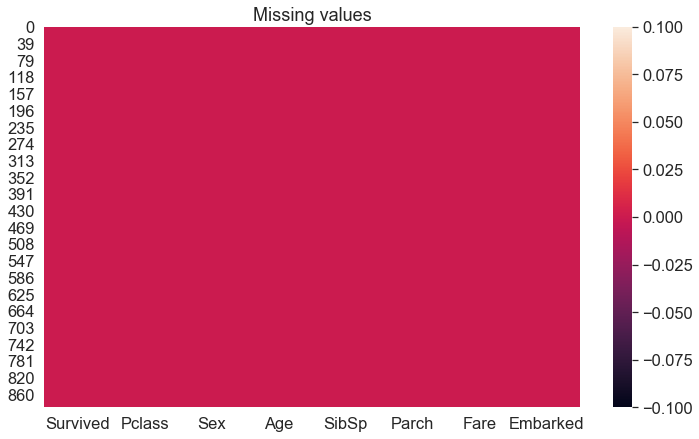

In [883]:
# Checking if there is any missing value
sns.heatmap(titanic_data.isnull()).set_title("Missing values")

## Encoding features

In [884]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [885]:
sex = pd.get_dummies(titanic_data["Sex"],drop_first=True)
embarked = pd.get_dummies(titanic_data["Embarked"],drop_first=True)

In [886]:
# Concatenating the dataframes
titanic_data = pd.concat([titanic_data, sex, embarked],axis=1)
titanic_data.drop(labels = ["Sex", "Embarked"], axis = 1, inplace = True)
titanic_data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [887]:
# Loading the test dataset
titanic_test = pd.read_csv(r"C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 3\titanic_test.csv")

In [888]:
titanic_test.shape

(418, 11)

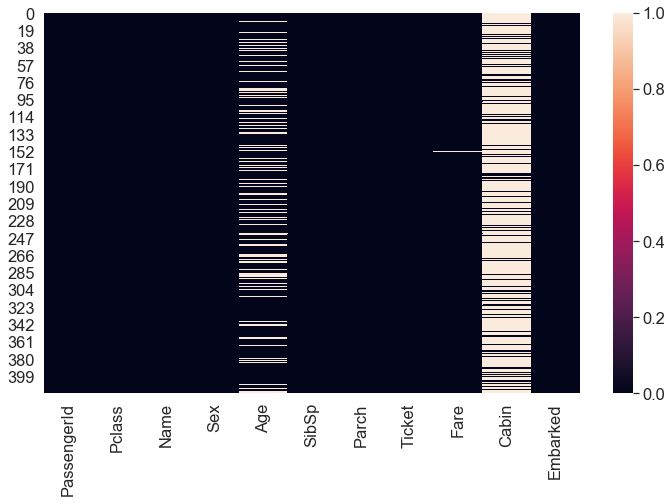

In [889]:
# Missing values in test data
sns.heatmap(titanic_test.isnull())

In [890]:
# Imputed values are saved in the variable
titanic_test["Age"] = titanic_test[["Age","Pclass"]].apply(impute_age,axis=1)

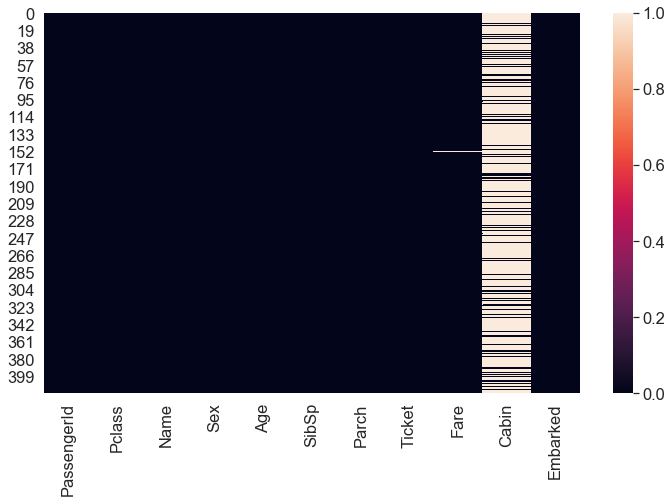

In [891]:
# Missing values in test data
sns.heatmap(titanic_test.isnull())

In [892]:
# Dropping not so useful columns
titanic_test = titanic_test.drop(["PassengerId","Name","Ticket","Cabin"], axis = 1)
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [893]:
# Encoding test data
sexTest = pd.get_dummies(titanic_test["Sex"],drop_first=True)
embarkedTest = pd.get_dummies(titanic_test["Embarked"],drop_first=True)

In [894]:
# Concatenating the dataframes
titanic_test = pd.concat([titanic_test, sexTest, embarkedTest],axis=1)
titanic_test.drop(labels = ["Sex", "Embarked"], axis = 1, inplace = True)
titanic_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,24.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,24.0,0,0,8.0500,1,0,1


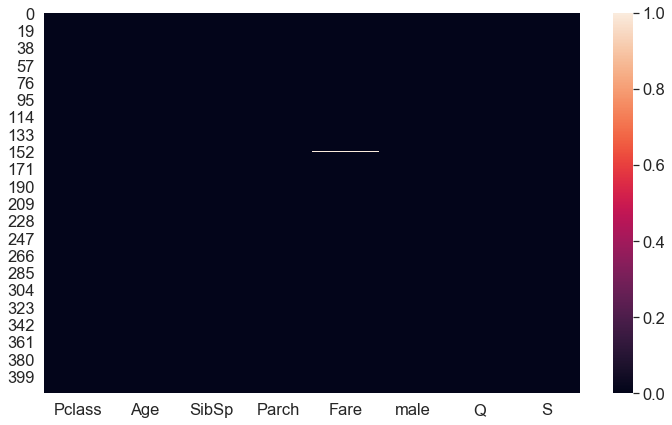

In [895]:
# Missing values in test data
sns.heatmap(titanic_test.isnull())

In [896]:
# Filling the one missing value with the average of the "Fare" column
titanic_test["Fare"].fillna(value=35,inplace=True)

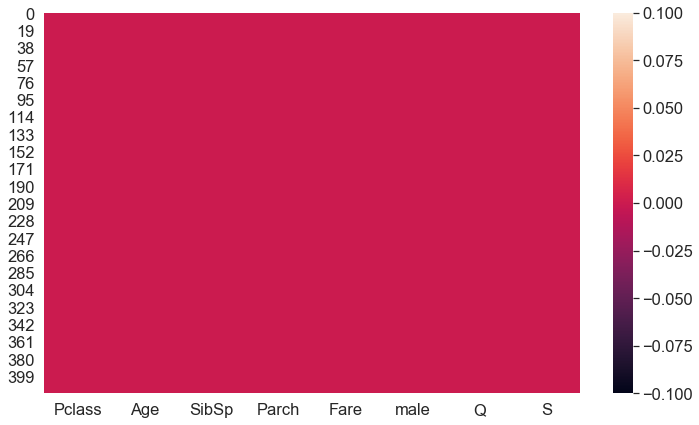

In [897]:
# Missing values in test data
sns.heatmap(titanic_test.isnull())

In [898]:
titanic_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,24.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,24.0,0,0,8.0500,1,0,1


## Predictions - Logistic Regression

In [902]:
# Naming the datasets clearly 
train_data = titanic_data
test_data = titanic_test

In [899]:
# Importing the required ML model for training the data and also for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [904]:
train_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [906]:
# Creating instances for X and y so that it can be used in during the model training and prediction
X = train_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q','S']]
y = train_data["Survived"]

In [907]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [908]:
# Creating a model
logistic_model = LogisticRegression()

In [909]:
# Training the model on dataset
logistic_model.fit(X_train,y_train)

C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [922]:
# Predicting the survival of passengers
predictions = logistic_model.predict(X_test)

In [911]:
# Importing confusion matrix a metric to evaluate the prediction performance
from sklearn.metrics import confusion_matrix

In [912]:
# Using confusion matrix for evaluation
pd.DataFrame(confusion_matrix(y_test,prediction),columns=["Predicted No","Predicted Yes"],index=["Actual No","Actual Yes"])

,Predicted No,Predicted Yes
Actual No,156,28
Actual Yes,26,84


**Observation**: From the confusion matrix, we can see that the false positive and false negative values are lower, so this model is acceptable for deployment.

In [920]:
# Prediction percent score
round(logistic_model.score(X_test,y_test)*100,2)

81.63

In [921]:
# Importing the classification report and confusion matrix for evaluation from sklearn
from sklearn.metrics import classification_report,confusion_matrix

In [923]:
print("Classification Report:")
print(classification_report(y_test,predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       184
           1       0.75      0.76      0.76       110

    accuracy                           0.82       294
   macro avg       0.80      0.81      0.80       294
weighted avg       0.82      0.82      0.82       294

Confusion Matrix:
[[156  28]
 [ 26  84]]


## Random Forest model

In [924]:
# Importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [925]:
# Creating instance
forest = RandomForestClassifier(n_estimators=320)

In [926]:
# Fitting the model onto the dataset
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=320,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [927]:
predictions2 = forest.predict(X_test)

In [928]:
# Creating classification report and confusion matrix again for the new model
print("Classification Report:")
print(classification_report(y_test,predictions2))
print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions2))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       184
           1       0.71      0.71      0.71       110

    accuracy                           0.78       294
   macro avg       0.77      0.77      0.77       294
weighted avg       0.78      0.78      0.78       294

Confusion Matrix:
[[152  32]
 [ 32  78]]


### From the above observations, Logistic Regression perform better than the Random Forest classifier for this Dataset

Accuracy value from Logistic Regression: **82%** 